In [3]:
# Import the necessary libraries
%matplotlib inline
import xarray as xr
import seaborn as sb
import tarfile
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import numpy as np

In [4]:
ds = xr.open_mfdataset(r'C:\work\datadrive\LIS\*.nc')

In [5]:
xmn = ds.attrs['SOUTH_WEST_CORNER_LON']
ymn = ds.attrs['SOUTH_WEST_CORNER_LAT']
dx = ds.attrs['DX']
dy = ds.attrs['DY']
nx = ds.dims['east_west']
ny = ds.dims['north_south']
x = np.arange(xmn, xmn + dx * nx, dx)
y = np.arange(ymn, ymn + dy * ny, dy)
data = np.tile(x,(ny,1))
ds.coords['longitude']= (('north_south','east_west'),data)
data = np.tile(y,(nx,1))
ds.coords['latitude']= (('north_south','east_west'),np.swapaxes(data,0,1))

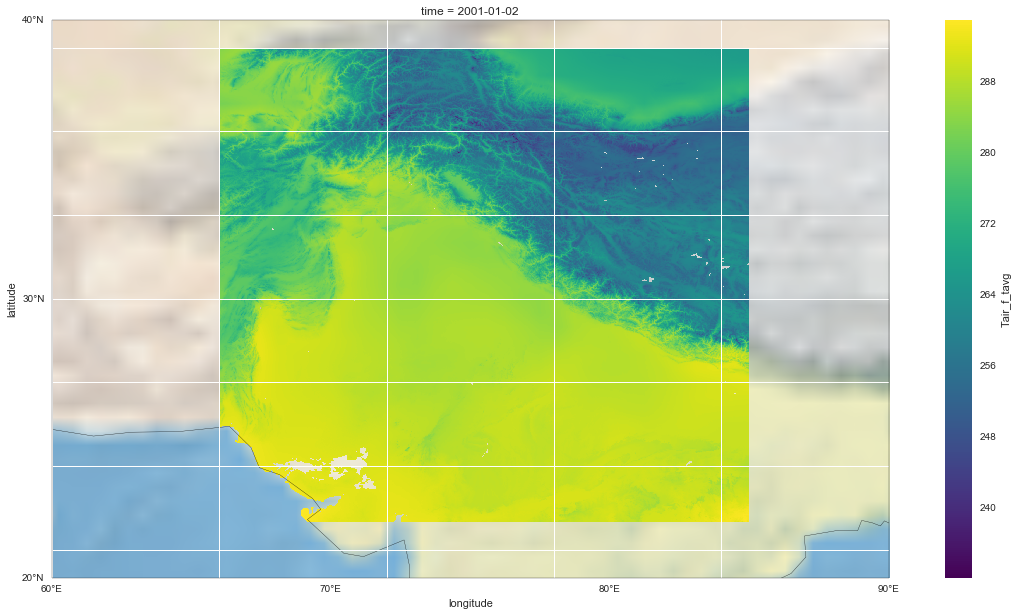

In [13]:
# Set up cartopy axes
plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.stock_img()
ax.gridlines()
ax.coastlines()
ax.set_ylim([20,40])
ax.set_xlim([60,90])
ax.set_yticks([20, 30, 40], crs=ccrs.PlateCarree())
ax.set_xticks([60, 70, 80, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# Plot the data of first timestamp only
fig = ds.Tair_f_tavg[1,:,:].plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), x='longitude', y='latitude', add_colorbar=True)